In [1]:
%load_ext autoreload
%autoreload 2

# Doc-ID Reassignment

## 1. Data download

We download [RCV1 dataset](https://paperswithcode.com/dataset/rcv1), in particular we use tf-idf representation from [sklearn](https://scikit-learn.org/0.18/datasets/rcv1.html).

In [2]:
from model.rcv1 import RCV1Downloader

downloader = RCV1Downloader()
downloader

RCV1Downloader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz; Downloaded: True]

### Download

In [3]:
%%time

downloader.download()

CPU times: user 111 µs, sys: 26 µs, total: 137 µs
Wall time: 117 µs


## 2. Data Loading

### Create configurations

In [4]:
from model.rcv1 import DataConfig

config = DataConfig(name="full", n_cluster=150)
config

full [Docs: all; Terms: all; N-Clusters: 150]

### Loader instance

In [5]:
from model.rcv1 import RCV1Loader

loader = RCV1Loader()
loader

RCV1Loader [File: /home/sebaq/Documents/GitHub/IR_project/dataset/data.npz]

### Load

In [6]:
collection = loader.load(n_docs=config.docs, n_terms=config.terms)
collection

DataCollection [Docs: 804414; Terms: 47219; Nonzero: 60915113]

## 3. Computing *d*-gap

In [7]:
from model.d_gap import DGapComputation

dgap = DGapComputation(collection=collection, data_name=config.name)
dgap

DGapComputation(full)[Docs: 804414; Terms: 47219; Computed: False]

### Compute *d*-gap statistics

In [8]:
dgap.compute_d_gaps()

In [9]:
avg_d_gaps = dgap.avg_d_gap_pterm
avg_d_gaps

array([10, 11, 11, ..., 88, 72, 80])

### Average *d*-gap per term plot

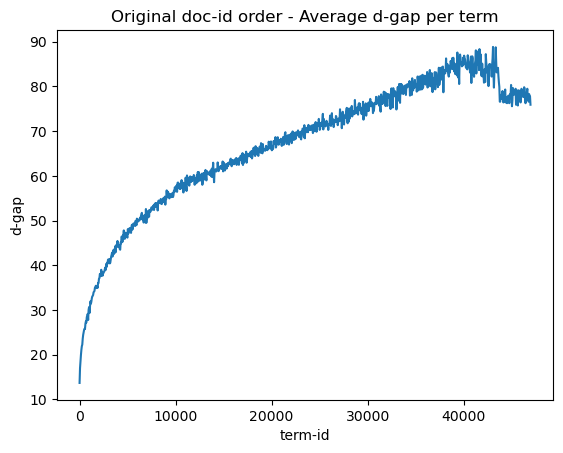

In [10]:
dgap.plot_avg_d_gap()

### Average *d*-gap

In [11]:
dgap.avg_d_gap

67.08168322073742

### Save statistics

In [12]:
dgap.save_d_gaps()

## 5. Clustering

### Compute number of clusters

In [13]:
n_cluster = config.n_cluster
n_cluster

150

### Create K-Means instance

In [14]:
from model.clustering import KMeansClustering

kmeans = KMeansClustering(collection=collection, data_name=config.name, k=n_cluster)
kmeans

KMeansClustering(full)[Items: 804414; k: 150; Labeling computed: False]

In [15]:
kmeans.fit()

In [16]:
labeling = kmeans.labeling
labeling

array([99, 81, 11, ..., 44,  5, 22])

In [17]:
kmeans.save_labeling()

## 6. Cluster split

### Get CollectionCluster instance

In [18]:
collection_clusters = kmeans.clusters

collection_clusters

RCV1Clusters(full)[Data: 804414, Clusters: 150, Mean-per-Cluster: 5362.760; centroids computed: False]

### Compute centroids

In [19]:
collection_clusters.compute_centroids()

In [20]:
centroids = collection_clusters.centroids
centroids

array([[0.00478897, 0.00595373, 0.00264883, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05267117, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00144668, 0.01232186, ..., 0.        , 0.        ,
        0.        ]])

In [21]:
collection_clusters.save_centroids()

## 7. doc-*ID* reassignment

In [22]:
from model.reassignment import DocIdReassignment

reassignment_computation = DocIdReassignment(
    cluster=collection_clusters,
    data_name=config.name
)

reassignment_computation

DocIdReassignment(full)[Items: 804414]

In [23]:
reassignment_computation.solve()

In [24]:
reassignment_computation.centroids_order

array([  2, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138,
       137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125,
       124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112,
       111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,
        98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,
        85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,
        72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,
        59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,
        46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,
        33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,
         7,   6,   5,   4,   3,   1,   0])

In [25]:
reassignment_computation.cluster_order

{0: array([3549, 6653, 6882, ...,  911,  503, 1453]),
 1: array([1, 0]),
 2: array([5, 2, 6, 7, 1, 0, 3, 4]),
 3: array([ 944,  961,  999, ...,  939,  237, 1035]),
 4: array([ 7,  3, 10, 11,  6,  4, 12,  8,  1,  9,  5,  0,  2]),
 5: array([ 8504,  7816,  8128, ..., 11775, 15367,   749]),
 6: array([30186, 40875, 21854, ..., 26313,  6623, 14905]),
 7: array([1292, 1659, 3950, ..., 2295, 1839, 4114]),
 8: array([1111, 4106, 4138, ..., 4806, 3957,  657]),
 9: array([5546, 8257, 6156, ..., 9651, 9054, 4032]),
 10: array([ 6656, 10280,  9428, ...,  5044,   289,   271]),
 11: array([ 7522,  8957,  1376, ...,  7871,  5296, 12892]),
 12: array([0]),
 13: array([ 972, 1219, 1936, ..., 1519, 2145,  246]),
 14: array([509,  97, 482, 499, 782, 210, 583, 719, 889, 681, 845, 647, 578,
        602, 530, 562, 877, 929, 702, 776, 132, 504, 748, 110, 920, 696,
        430,  47,  22, 722, 842, 518, 761, 769, 883, 563, 479, 537, 786,
        811, 650, 770, 620, 655, 137, 166, 154, 551, 933, 684, 815, 638,

In [26]:
reassignment_computation.save_order()

In [27]:
collection_reassigned = reassignment_computation.reassign_doc_id()

In [28]:
from model.d_gap import DGapComputationReassigned

dgap_reass = DGapComputationReassigned(collection=collection_reassigned, data_name=config.name)
dgap_reass

DGapComputation(full)[Docs: 804414; Terms: 47219; Computed: False]

In [29]:
dgap_reass.compute_d_gaps()

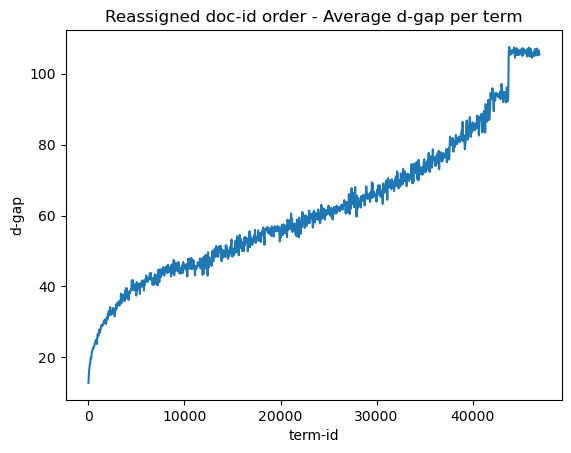

In [30]:
dgap_reass.plot_avg_d_gap()

In [31]:
dgap_reass.save_d_gaps()

## 8. Inference

In [32]:
from model.d_gap import DGapInference

inference = DGapInference(d_gap_original=dgap, d_gap_reassigned=dgap_reass, data_name=config.name)
inference

DGapInference[Terms: 47219]

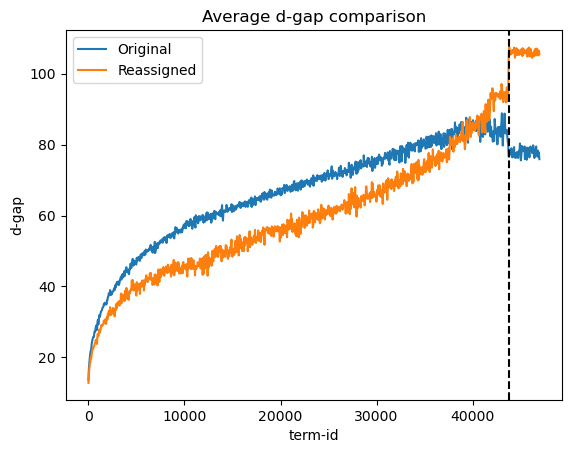

In [33]:
inference.plot_avg_d_gap()

In [34]:
inference.avg_compression

7.8783648200656815